# Cluster Analysis using KMeans

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from numpy import array, argmin
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import euclidean

In [72]:
df = pd.read_csv('un.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 14 columns):
country                   207 non-null object
region                    207 non-null object
tfr                       197 non-null float64
contraception             144 non-null float64
educationMale             76 non-null float64
educationFemale           76 non-null float64
lifeMale                  196 non-null float64
lifeFemale                196 non-null float64
infantMortality           201 non-null float64
GDPperCapita              197 non-null float64
economicActivityMale      165 non-null float64
economicActivityFemale    165 non-null float64
illiteracyMale            160 non-null float64
illiteracyFemale          160 non-null float64
dtypes: float64(12), object(2)
memory usage: 24.3+ KB


In [73]:
print 'There are {} countries in this dataset.'.format(len(df.country.value_counts()))

There are 207 countries in this dataset.


In [74]:
# Selecting best columns:
df2 = df[['country','region','tfr','lifeMale','lifeFemale','infantMortality','GDPperCapita']]
# Removing lines with NA in any col
df2 = df2.dropna(axis=0, how='any', subset=['tfr','lifeMale','lifeFemale','infantMortality','GDPperCapita'])

In [75]:
# Run K Means for 1 to 10 clusters
K = array(range(1,11))
KM = [kmeans(df2[['tfr','lifeMale','lifeFemale','infantMortality','GDPperCapita']].values,k) for k in K]

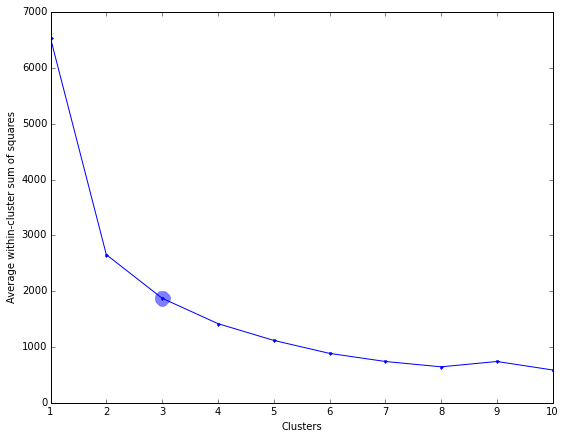

In [76]:
# Determine the best number of clusters to use
SoS = [i[1] for i in KM]
plt.figure(figsize=(9,7))
plt.plot(K,SoS,marker='.')
plt.xlabel('Clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.plot(3,KM[2][1],marker='o',ms=15.0,mfc='b',mec='b',alpha=0.5)

In [77]:
# Re run K Means for the optimal number of clusters (3)
KM = kmeans(df2[['tfr','lifeMale','lifeFemale','infantMortality','GDPperCapita']].values,3)

In [82]:
# Determine the distance between each country and each cluster centroid, and determine the closest centroid
def distances(series):
    for i in range(3):
        series[i]=euclidean(series.loc[['tfr','lifeMale','lifeFemale','infantMortality','GDPperCapita']],KM[0][i])
    return series
    
df2 = pd.concat([df2,pd.DataFrame(columns=list('012'))])    
df2 = df2.apply(distances, axis=1)
df2['cluster'] = df2[[0,1,2]].idxmin(axis=1).astype(int)
df2.head()

,0,1,2,GDPperCapita,cluster,country,infantMortality,lifeFemale,lifeMale,region,tfr
0,24816.929193,9197.266724,1377.854857,2848,2,Afghanistan,154,46.0,45.0,Asia,6.90
1,26801.463516,11181.119514,611.439220,863,2,Albania,32,74.0,68.0,Europe,2.60
2,26133.479616,10513.150353,59.145014,1531,2,Algeria,44,70.3,67.5,Africa,3.81
5,27309.737524,11689.691998,1121.130589,355,2,Angola,124,48.1,44.9,Africa,6.69
7,19609.456931,3989.112622,6581.264622,8055,1,Argentina,22,76.8,69.6,America,2.62


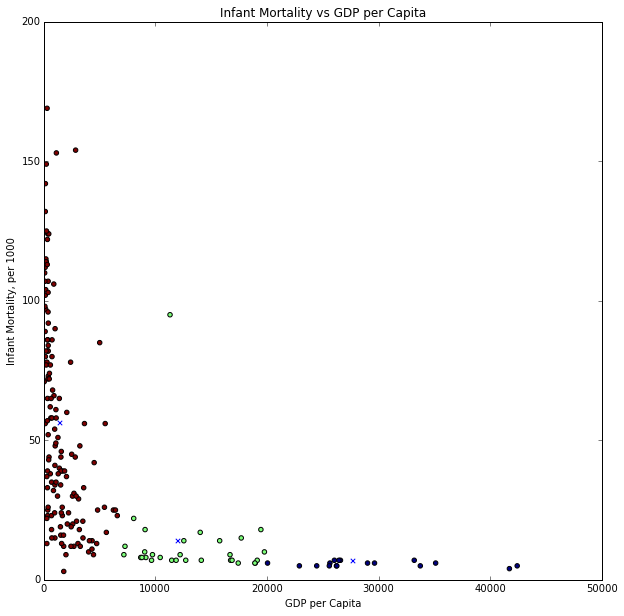

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x=df2['GDPperCapita'],y=df2['infantMortality'],c=df2['cluster'])
ax.set_xlim(0,50000)
ax.set_ylim(0,200)

x_centroids = [KM[0][0][4],KM[0][1][4],KM[0][2][4]]
y_centroids = [KM[0][0][3],KM[0][1][3],KM[0][2][3]]

ax.scatter(x_centroids,y_centroids,marker='x')

plt.title('Infant Mortality vs GDP per Capita')
plt.ylabel('Infant Mortality, per 1000')
plt.xlabel('GDP per Capita')

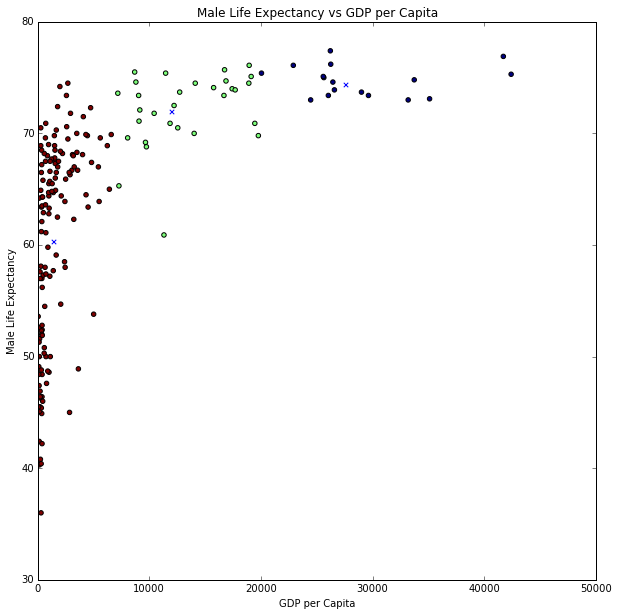

In [94]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x=df2['GDPperCapita'],y=df2['lifeMale'],c=df2['cluster'])
ax.set_xlim(0,50000)

x_centroids = [KM[0][0][4],KM[0][1][4],KM[0][2][4]]
y_centroids = [KM[0][0][1],KM[0][1][1],KM[0][2][1]]

ax.scatter(x_centroids,y_centroids,marker='x')

plt.title('Male Life Expectancy vs GDP per Capita')
plt.ylabel('Male Life Expectancy')
plt.xlabel('GDP per Capita')

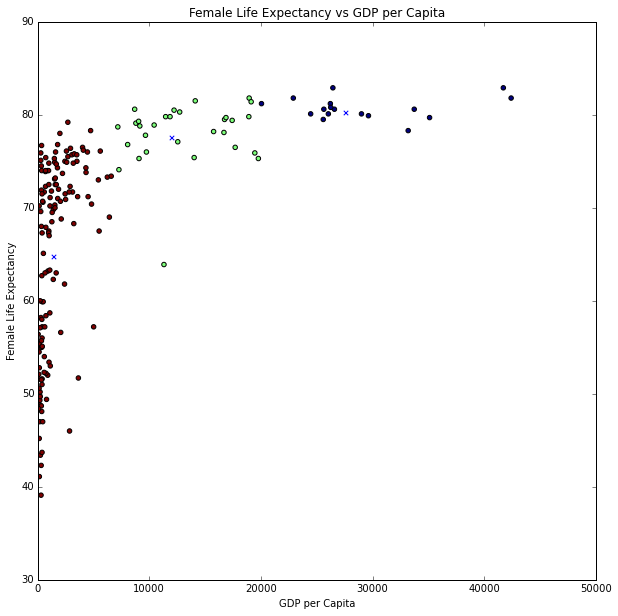

In [95]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x=df2['GDPperCapita'],y=df2['lifeFemale'],c=df2['cluster'])
ax.set_xlim(0,50000)

x_centroids = [KM[0][0][4],KM[0][1][4],KM[0][2][4]]
y_centroids = [KM[0][0][2],KM[0][1][2],KM[0][2][2]]

ax.scatter(x_centroids,y_centroids,marker='x')

plt.title('Female Life Expectancy vs GDP per Capita')
plt.ylabel('Female Life Expectancy')
plt.xlabel('GDP per Capita')